Choose data source:
1. Use sample generated data
2. Upload your own CSV file
Enter 1 or 2: 2


Saving sample_data.csv to sample_data.csv

Uploaded Data (first 5 rows):
   Feature1  Feature2
0       1.2       3.4
1       2.3       4.5
2       1.8       3.8
3       8.5       7.2
4       9.1       6.8

Using columns for clustering: ['Feature1', 'Feature2']


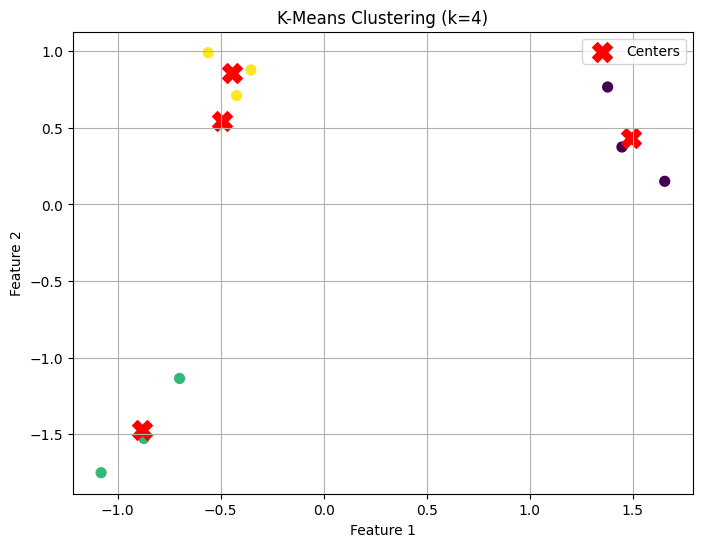


Clustered Data (first 5 rows):
   Feature1  Feature2  Cluster
0 -1.079746 -1.751887        2
1 -0.699067 -1.136208        2
2 -0.872103 -1.528004        2
3  1.446583  0.375005        0
4  1.654227  0.151121        0


In [2]:
# Install required packages (optional, preinstalled in Colab)
# !pip install scikit-learn pandas matplotlib

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from google.colab import files

# Step 2: Ask user to choose between synthetic data or file upload
print("Choose data source:")
print("1. Use sample generated data")
print("2. Upload your own CSV file")
choice = input("Enter 1 or 2: ")

if choice == '2':
    # Upload and read user file
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(filename)

    print("\nUploaded Data (first 5 rows):")
    print(df.head())

    # Select only numeric columns
    numeric_df = df.select_dtypes(include=np.number)
    print(f"\nUsing columns for clustering: {list(numeric_df.columns)}")

    X = numeric_df.dropna()  # Drop missing values
else:
    # Generate synthetic data
    X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
    X = pd.DataFrame(X, columns=["Feature1", "Feature2"])

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply KMeans clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Step 5: Add cluster labels to data
X_clustered = pd.DataFrame(X_scaled, columns=[f"Feature{i+1}" for i in range(X_scaled.shape[1])])
X_clustered['Cluster'] = labels

# Step 6: Visualize clusters (only for 2D data)
if X_scaled.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=200, c='red', marker='X', label='Centers')
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Cannot visualize clusters: data has less than 2 numeric features.")

# Step 7: Show final clustered data
print("\nClustered Data (first 5 rows):")
print(X_clustered.head())
